# Problem set 3 (90 pts)

## Important note: the template for your solution filename is Name_Surname_PS3.ipynb

### The correct answer to the bonus question can be used as an additional reason to increase the final grade in the border case

## Problem 1 (25 pts)

- (5 pts) Prove that $\mathrm{vec}(AXB) = (B^\top \otimes A)\, \mathrm{vec}(X)$ if $\mathrm{vec}(X)$ is a columnwise reshape of a matrix into a long vector. What does it change if the reshape is rowwise? 

**Note:** To make a columnwise reshape in Python one should use ```np.reshape(X, order='f')```, where the string ```'f'``` stands for the Fortran ordering. 

- (2 pts) What is the complexity of a naive computation of $(A \otimes B) x$? Show how it can be reduced.

- (3 pts) Let matrices $A$ and $B$ have eigendecompositions $A = S_A\Lambda_A S_A^{-1}$ and $B = S_B\Lambda_B S^{-1}_B$. Find eigenvectors and eigenvalues of the matrix $A\otimes I + I \otimes B$, where dimension of $I$ coincides with the dimension of $A$ and $B$.


- (10 pts) Let $A = \mathrm{diag}\left(\frac{1}{1000},\frac{2}{1000},\dots \frac{999}{1000}, 1, 1000 \right)$. Estimate analytically the number of iterations required  to solve linear system with $A$ with the relative accuracy $10^{-4}$ using
    - Richardson iteration with the optimal choice of parameter (use $2$-norm)
    - Chebyshev iteration (use $2$-norm)
    - Conjugate gradient method (use $A$-norm).
    
- (5 pts) Provide numerical confirmation of your estimate from theoretical point of view
---

For matrices $A\in\mathbb{R}^{n\times m}$ and $B\in\mathbb{R}^{l\times k}$ its Kronecker product is defined as a block matrix of the form 

$$
   A\otimes B = \begin{bmatrix}a_{11}B & \dots & a_{1m}B \\ \vdots & \ddots & \vdots \\ a_{n1}B & \dots & a_{nm}B\end{bmatrix}\in\mathbb{R}^{nl\times mk}.
$$

If A is an N × M matrix and B is a L × K matrix:

Using //  and %  to denote truncating integer division and remainder, respectively, and numbering the matrix elements starting from 0, one obtains: $(A \otimes B)_{Lr+v,Kw+w}=a_{rs}b_{vw}$ 

Short list of Kronecker product properties

- It is bilinear
- $(A\otimes B) (C\otimes D) = AC \otimes BD$
- $(A\otimes B)^{-1}=A^{-1}\otimes B^{-1}$
- Let $\mathrm{vec}(X)$ be vectorization of matrix $X$ columnwise. Then 
$\mathrm{vec}(AXB) = (B^T \otimes A) \mathrm{vec}(X).$

the vectorization of a $M\times N$ matrix A, denoted vec(A), is the $MN \times 1$ column vector obtained by stacking the columns of the matrix A on top of one another:

$\text{vec} ⁡ ( A ) = [a_{1,1},...,a_{M,1},a_{1,2},...,a_{M,2},.....,a_{1,N},...,a_{M,N}]^T$



##### - **1.1**(5 pts) Prove that $\mathrm{vec}(AXB) = (B^\top \otimes A)\ \mathrm{vec}(X)$ if $\mathrm{vec}(X)$ is a columnwise reshape of a matrix into a long vector. What does it change if the reshape is rowwise? 

Note: To make a columnwise reshape in Python one should use np.reshape(X, order='f'), where the string 'f' stands for the Fortran ordering. 

Let $A \in \mathbb{R}^{K \times L}$,$X \in \mathbb{R}^{L\times M}$, $B \in \mathbb{R}^{M \times N}$, then $AXB \in \mathbb{R}^{K\times N}$, $B^T \otimes A \in \mathbb{R}^{NK\times ML}$, $\text{vec}(X) \in \mathbb{R}^{LM \times 1}$

$k,m,n,l$ correspond to matrix indexes along $K,L,M,N$ dimensions

- $(B^T \otimes A)_{Kn + k, Lm + l} = B_{m, n} A_{k, l}$

- $\text{vec}(X)_{Lm+l}=X_{l,m}$

- $\text{vec}(AXB)_{Kn+k}=(AXB)_{k,n}=A_{k,l}X_{l,m}B_{m,n}$

After combining it all together:

$\left ((B^T \otimes A)\ \mathrm{vec}(X)\right )_{Kn+k} =(B^T \otimes A)_{Kn + k, Lm + l}\text{vec}(X)_{Lm+l}= B_{m, n} A_{k, l} \cdot X_{l,m} =  A_{k, l} X_{l,m} B_{m, n}=\text{vec}(AXB)_{Kn+k} \Rightarrow   (B^T \otimes A)\ \mathrm{vec}(X) = \text{vec}(AXB) $  

What will change for rowwise reshape:
- $\text{vec}(X)_{Ml+M}=X_{l,m}$
- $\text{vec}(AXB)_{Nk+n}=(AXB)_{k,n}=A_{k,l}X_{l,m}B_{m,n}$

$\left ((B^T \otimes A)\ \mathrm{vec}(X)\right )_{Nk+n} =(B^T \otimes A)_{Nk + n, Ml + m}\text{vec}(X)_{Ml+m}= B_{m, n} A_{k, l} \cdot X_{l,m} =  A_{k, l} X_{l,m} B_{m, n}=\text{vec}(AXB)_{Nk+n} \Rightarrow   (B^T \otimes A)\ \mathrm{vec}(X) = \text{vec}(AXB) $  

---

##### - **1.2**(2 pts) What is the complexity of a naive computation of $(A \otimes B) x$? Show how it can be reduced.

Let $A \in \mathbb{R}^{K \times L}$, 
$B \in \mathbb{R}^{M \times N}$, 
then $A \otimes B \in \mathbb{R}^{KM\times LN}$, 
$x=\text{vec}(X) \in \mathbb{R}^{LN \times 1}$

- $A \otimes B$ consist of KMLN elements, each element is a multiplication of two numbers from A and B respectively. Thus, the complexity of $A \otimes B$ is $O(KLMN)$
- multiplication of $A \otimes B$ on $x$ has a complexity of $O(LN)\cdot O(KM)=O(KLMN)$

Thus, overall complexity of naive algorithm is $O(KLMN)$

To reduce the complexity both of these steps complexity should be reduced.

One of Kroneker product's properties is: $(A\otimes B) (C\otimes D) = AC \otimes BD$ which consequence is 
$(A\otimes B)=(A\otimes I_M) (I_L\otimes B)$ because 
$A\cdot I_L=A,I_M\cdot B=B$

$
I_L \otimes B = 
\begin{bmatrix} 
     B      & \dots  & 0\\
     \vdots & \ddots & \vdots \\
     0      & \dots       & B
\end{bmatrix}
=\mathrm{diag}(B,...,B)
 \in \mathbb{R}^{LM \times LN}\\
$

$
A \otimes I_M = 
\begin{bmatrix}
    A_{1,1} I_M & \dots & A_{1,L} I_M\\
    \vdots & \ddots & \vdots\\
    A_{K, 1} I_M & \dots & A_{K, L} I_M
\end{bmatrix} \in \mathbb{R}^{KM \times LM}, \text{where} A_{k,l}I_M= \mathrm{diag}(A_{k,l},...,A_{k,l}) \in \mathbb{R}^{M \times M}
$

$(A\otimes B)x=(A\otimes I_M) (I_L\otimes B)x = (A\otimes I_M) \left((I_L\otimes B)x \right)$
- computation of $(A\otimes I_M)$ and $(I_L\otimes B)$ is not needed, so the main parts of computation are $(I_L\otimes B) \cdot x$ and $(A\otimes I_M) \cdot \left((I_L\otimes B)x \right)$
- in each row $(I_L\otimes B)$ has only N nonzero arguments, so the complexity of multiplication for $(I_L\otimes B) \cdot x$ is $O(N) \cdot O(LM) = O(LMN)$
; $\left( (I_L\otimes B) \cdot x\right) \in \mathbb{R}^{LM \times LN}$
- $(A\otimes I_M)$ has only L nonzero values in each row (one for each $A_{i,1},...,A_{i,L})$, so the complexity of multiplication is $O(L) \cdot O(KM)=O(KLM)$

Thus, in total there will be a complexity $O(LMN+KLM)=O(LM(N+K))$

##### - **1.3**(3 pts) Let matrices $A$ and $B$ have eigendecompositions $A = S_A\Lambda_A S_A^{-1}$ and $B = S_B\Lambda_B S^{-1}_B$. Find eigenvectors and eigenvalues of the matrix $A\otimes I + I \otimes B$, where dimension of $I$ coincides with the dimension of $A$ and $B$.

Let $A, B \in \mathbb{R}^{n \times n}$, 
then $A \otimes I \text{ and }I \otimes B \in \mathbb{R}^{nn\times nn}$

the i-th column of $S_A=[a_{1},...,a_{N}]$ is the i-th eigenvector of $A$, $Λ_A$ is the diagonal matrix whose diagonal elements are the corresponding eigenvalues, $Λ^{ii}_A = λ_i$. 

the i-th column of $S_B=[b_{1},...,b_{N}]$ is the i-th eigenvector of $B$, $Λ_B$ is the diagonal matrix whose diagonal elements are the corresponding eigenvalues, $Λ^{ii}_B = \gamma_i$. 

$
A\otimes I + I \otimes B
=(S_A\Lambda_A S_A^{-1})\otimes I + I \otimes (S_B\Lambda_B S_B^{-1})
=(S_A\Lambda_A S_A^{-1})\otimes (S_B S_B^{-1}) + (S_A S_A^{-1}) \otimes (S_B\Lambda_B S_B^{-1})
=((S_A\Lambda_A)\otimes S_B)(S_A^{-1}\otimes S_B^{-1}) + (S_A \otimes (S_B\Lambda_B))(S_A^{-1} \otimes S_B^{-1})
=((S_A\Lambda_A)\otimes S_B+S_A \otimes (S_B\Lambda_B))(S_A^{-1}\otimes S_B^{-1})
=((S_A\Lambda_A)\otimes (S_B I)+(S_A I) \otimes (S_B\Lambda_B))(S_A^{-1}\otimes S_B^{-1})
=((S_A \otimes S_B) (\Lambda_A \otimes I)+(S_A \otimes S_B) (I \otimes \Lambda_B))(S_A \otimes S_B)^{-1}
=(S_A \otimes S_B) (\Lambda_A \otimes I + I \otimes \Lambda_B)(S_A \otimes S_B)^{-1}
$

$
I \otimes Λ_B = 
\begin{bmatrix} 
     Λ_B      & \dots  & 0\\
     \vdots & \ddots & \vdots \\
     0      & \dots       & Λ_B
\end{bmatrix}
=\mathrm{diag}(\gamma_1,\gamma_2,...,\gamma_n,\gamma_1,\gamma_2,...,\gamma_n,...) \in \mathbb{R}^{NN \times NN}\\
$

$
Λ_A \otimes I = 
\begin{bmatrix}
    Λ_A^{1,1} I & \dots & Λ_A^{1,N} I\\
    \vdots & \ddots & \vdots\\
    Λ_A^{K, 1} I & \dots & Λ_A^{N, N} I
\end{bmatrix}
=
\begin{bmatrix}
    Λ_A^{1,1} I & \dots & 0\\
    \vdots & \ddots & \vdots\\
    0 & \dots & Λ_A^{N, N} I
\end{bmatrix}
=
\mathrm{diag}(\lambda_1,\lambda_1,...,\lambda_1,\lambda_2,\lambda_2,...,\lambda_{n-1},\lambda_n,...,\lambda_n) \in \mathbb{R}^{NN \times NN}
$

Thus 
- $I \otimes Λ_B+Λ_A \otimes I$ is a diagonal matrix which contains eigenvalues $v_k$ of $A\otimes I + I \otimes B$: 
$v_k = \gamma_{(k-1)\%n+1}+λ_{(k-1)//n+1}$

- the i-th column of $(S_A \otimes S_B)$ is the i-th eigenvector of $A\otimes I + I \otimes B$

#####- **1.4**(10 pts) Let $A = \mathrm{diag}\left(\frac{1}{1000},\frac{2}{1000},\dots \frac{999}{1000}, 1, 1000 \right)$. Estimate analytically the number of iterations required  to solve linear system with $A$ with the relative accuracy $10^{-4}$ using
- Richardson iteration with the optimal choice of parameter (use $2$-norm)
- Chebyshev iteration (use $2$-norm)
- Conjugate gradient method (use $A$-norm).

$\text{cond}(A)=\dfrac{|\lambda_{\text{max}}|}{|\lambda_{\text{min}}|}=10^6$

1. **Richardson iterations**

$Ax = f,$\
$x_{k+1} = x_k - \tau (Ax_k - f)$

where $\tau$ is the **iteration parameter**






*Condition number and convergence speed*

From the lecture:

$$\|e_n\|_2 \leq q^{n} \|e_0\|_2,$$

where 

$$
   q = \frac{\lambda_{\max} - \lambda_{\min}}{\lambda_{\max} + \lambda_{\min}} = \frac{\mathrm{cond}(A) - 1}{\mathrm{cond}(A)+1}= \dfrac{10^6-1}{10^6+1}=\dfrac{1-10^{-6}}{1+10^{-6}},e_i = \Vert x_i - x^* \Vert_2
$$
For the relative error:\
$$
    \frac{\Vert x_n - x^*\Vert_2}{\Vert x^* \Vert_2} \leq q^{n} \frac{\Vert x_0 - x^* \Vert_2}{\Vert x^* \Vert_2}, \quad x_0 \text{ is initial approximation}
$$

for estimation let's suppose $\frac{\Vert x_0 - x^* \Vert_2}{\Vert x^* \Vert_2} \approx 1$, then $q^n=10^{-4} \Rightarrow n = \log_q(10^{-4})=-4\log_q(10)\approx 4.6*10^6$

2. **Chebyshev iterations**

$$e_{k+1} =  p(A) e_0, $$

where $p(A)$ is a **matrix polynomial** (simplest matrix function)  

$$
   p(A) = (I - \tau_k A) \ldots (I - \tau_0 A),
$$

and $p(0) = 1$.

$$
   e_{n+1} \leq C q^n e_0, \quad q = \frac{\sqrt{\mathrm{cond}(A)}-1}{\sqrt{\mathrm{cond}(A)}+1},
$$
then 
$$
    Cq^n=10^{-4} \Rightarrow n = \log_q(10^{-4}/c)\approx 4.6*10^3 \text{ for C=1 }
$$

3. **CG iterations**

If $A$ has only $m$ different eigenvalues, CG converges in $m$ iterations. Matrix $A$ has 1001 different eigenvalue, so $n=1001$

$$10^{-4}=\frac{\Vert x_k - x_* \Vert_A }{\Vert x_* \Vert_A} \leq \gamma \left( \frac{\sqrt{\mathrm{cond}(A)}-1}{\sqrt{\mathrm{cond}(A)}+1}\right)^k=\gamma q^k$$

$q^k \geq 10^{-4}/γ$

$q^k \geq \frac{1}{10^4 \times γ}, q < 1$

$\log_q(q^k) \leq \log_q(\frac{1}{10^4 \times γ})$

$k \leq - 4\log_q 10 - \log_q γ$



$k \leq 4605 - \log_q γ$

In [ ]:
q = (10**3-1)/(10**3+1)

In [ ]:
q

0.998001998001998

In [ ]:
import math

- 4*math.log(10, q)

4605.168650930854

min(1001, 4605) = 1001 $\rightarrow$ 1001 is an estimated number of iterations

####- 1.5(5 pts) Provide numerical confirmation of your estimate from theoretical point of view

In [ ]:
#initial data
import numpy as np
from scipy.sparse import diags
import matplotlib.pyplot as plt

diag = [i/1000 for i in range(1,1001)]+[1000]
A = diags(diag,0).toarray()

x0 = np.zeros(1001)
f = np.random.rand(1001)
x_true = np.linalg.solve(A , f)
x_true_norm = np.linalg.norm(x_true)

lmbda_min=1
lmbda_max=1e3

##### **1.Richardson iterations**

In [ ]:
def richardson_iteration(A=A, f=f, x0=x0, error_threshold=1e-4):
    t_opt = 2 / (lmbda_min + lmbda_max)
    x = x0
    errors = []
    i = 0
    while True:
      x = x - t_opt * (A.dot(x) - f)
      error = np.linalg.norm(x - x_true) / np.linalg.norm(x_true)
      if error <= error_threshold:
          break
      errors.append(error)
      i+=1
      if i % 100000 == 0:
        print("iteration {:-7d}, error = {:-5.3e}".format(i,error))
    return x, errors, i

In [ ]:
richardson_x, richardson_errors, richardson_iteration = richardson_iteration()

iteration  100000, error = 7.734e-01
iteration  200000, error = 6.196e-01
iteration  300000, error = 5.005e-01
iteration  400000, error = 4.062e-01
iteration  500000, error = 3.307e-01
iteration  600000, error = 2.697e-01
iteration  700000, error = 2.203e-01
iteration  800000, error = 1.801e-01
iteration  900000, error = 1.473e-01
iteration 1000000, error = 1.205e-01
iteration 1100000, error = 9.862e-02
iteration 1200000, error = 8.073e-02
iteration 1300000, error = 6.609e-02
iteration 1400000, error = 5.411e-02
iteration 1500000, error = 4.431e-02
iteration 1600000, error = 3.628e-02
iteration 1700000, error = 2.971e-02
iteration 1800000, error = 2.433e-02
iteration 1900000, error = 1.992e-02
iteration 2000000, error = 1.631e-02
iteration 2100000, error = 1.336e-02
iteration 2200000, error = 1.094e-02
iteration 2300000, error = 8.958e-03
iteration 2400000, error = 7.336e-03
iteration 2500000, error = 6.007e-03
iteration 2600000, error = 4.919e-03
iteration 2700000, error = 4.028e-03
i

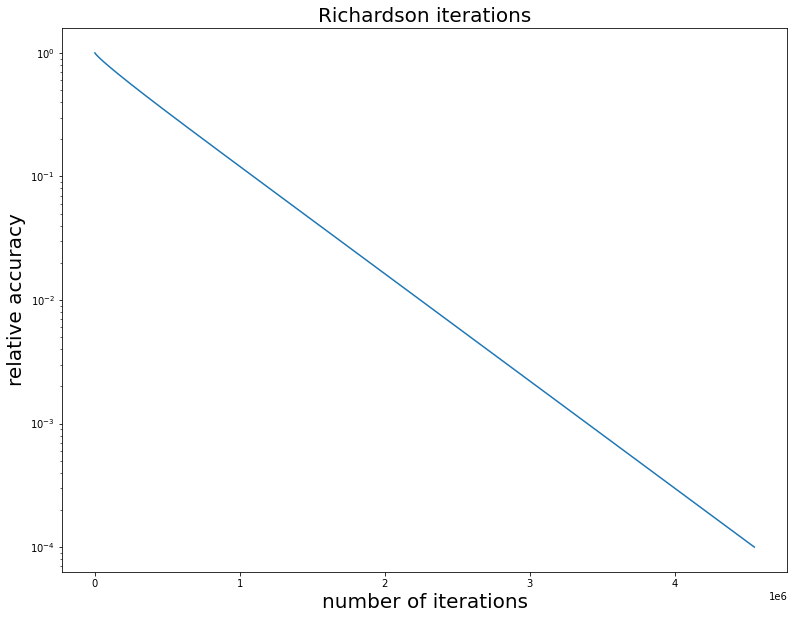

In [ ]:
plt.figure(figsize=(13,10))
plt.plot(richardson_errors)
plt.yscale('log')
plt.title("Richardson iterations",fontsize=20)
plt.xlabel("number of iterations",fontsize=20)
plt.ylabel("relative accuracy",fontsize=20)
plt.show()

In [ ]:
print("{:e}".format(  len(richardson_errors)    )   )

4.549821e+06


The estimated number of iterations $4.6 \cdot 10^6 \approx 4.549821 \cdot 10^6$

##### **2. Chebyshev iterations**

In [ ]:
def chebyshev_iteration(A, f, x0, error_threshold=1e-4):
    x_true = np.linalg.solve(A, f)
    x_true_norm = np.linalg.norm(x_true)
    eigvalues = np.linalg.eigvals(A)
    lam_max, lam_min = np.max(eigvalues), np.min(eigvalues)
    d = (lam_max + lam_min)/2
    c = (lam_max - lam_min)/2

    pre_cond = np.eye(A.shape[0])
    x = x0
    r = f - A.dot(x)

    i = 0
    errors = []

    while True:
        z = np.linalg.solve(pre_cond, r)
        if i == 0:
            p = z
            alpha = 1/d
        elif i == 1:
            beta = (1/2) * (c * alpha) ** 2
            alpha = 1/(d - beta/alpha)
            p = z + beta * p 
        else:
            beta = (c * alpha/2) ** 2
            alpha = 1/(d - beta / alpha)
            p = z + beta * p
        
        x = x + alpha * p
        r = f - A.dot(x)
        error = np.linalg.norm(x_true - x)/x_true_norm
        errors.append(error)
        if error <= error_threshold:
            break
        if i % 500 ==0:
            print("iteration {:-7d}, error = {:-5.3e}".format(i,error))  
        i += 1
    return x, errors

In [ ]:
cheb_result, cheb_errors = chebyshev_iteration(A, f, x0)

iteration       0, error = 1.000e+00
iteration     500, error = 4.994e-01
iteration    1000, error = 2.066e-01
iteration    1500, error = 9.219e-02
iteration    2000, error = 3.008e-02
iteration    2500, error = 1.001e-02
iteration    3000, error = 4.531e-03
iteration    3500, error = 1.559e-03
iteration    4000, error = 4.784e-04
iteration    4500, error = 2.241e-04


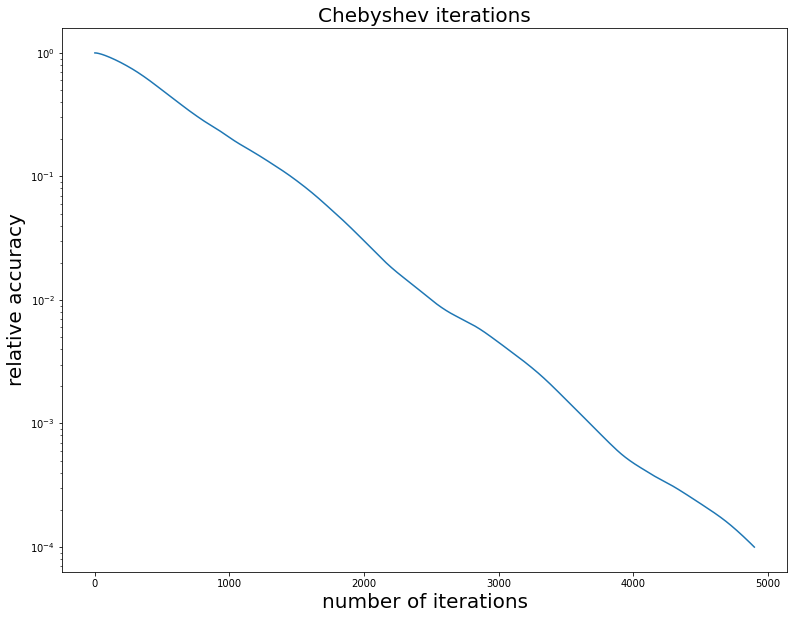

In [ ]:
plt.figure(figsize=(13,10))
plt.plot(cheb_errors)
plt.yscale('log')
plt.title("Chebyshev iterations",fontsize=20)
plt.xlabel("number of iterations",fontsize=20)
plt.ylabel("relative accuracy",fontsize=20)
plt.show()

In [ ]:
len(cheb_errors)

4900

estimation: $4.6 \cdot 10^3$

result: $4.9 \cdot 10^3$

#####**3.Conjugate gradient**

In [ ]:
def conjgrad(A, b, x, error_threshold=1e-4):
    r = b - np.dot(A, x)
    p = r
    rsold = np.dot(np.transpose(r), r)
    i = 0
    errors = []
    while True:
        Ap = np.dot(A, p)
        alpha = rsold / np.dot(np.transpose(p), Ap)
        x = x + np.dot(alpha, p)
        r = r - np.dot(alpha, Ap)
        rsnew = np.dot(np.transpose(r), r)
        error = np.sqrt(rsnew)
        errors.append(error)
        if error < error_threshold:
            break
        p = r + (rsnew/rsold)*p
        rsold = rsnew
        i += 1
    return x, errors

In [ ]:
conj_result, conj_errors = conjgrad(A, f, x0, 1e-4)

In [ ]:
len(conj_errors)

167

defferentiates pretty heavily from estimated 1001 iterations

# Problem 2 (65 pts)
### On the performance of conjugate gradient method for BTTB matrices.

You are given 2D image (QR-code) and convolution operator $T$. The application of $T$ results in smoothing of the image. In exact arithmetic, the proposed $T$ is non-singular. However, it becomes rather ill-conditioned with increasing $N$ in finite precision arithmetic. In this task you need to study how the conjugate gradient method performs in this case.

The original passcode is given below:

(-0.5, 329.5, 329.5, -0.5)

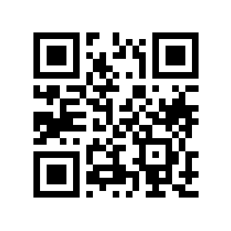

In [2]:
import  numpy as     np
from    numpy import fft
import matplotlib.pyplot as plt
import scipy.sparse.linalg as spla
import time

x = plt.imread('qrcode.gif')[:,:,0]
n = x.shape[0]
plt.imshow(x, cmap="gray")
plt.axis("off")

Blurring can be performed by convolving $n\times n$ QR-code with the following filter:

$$T_{i_1j_1,i_2j_2} = T_{i_1-j_1,i_2-j_2} = \frac{\alpha}{\pi}e^{-\alpha[(i_1-j_1)^2 + (i_2-j_2)^2]}, \quad i_1,j_1,i_2,j_2 = 1 \ldots n, \quad 1 > \alpha > 0.$$

You know from lectures that this convolution can be viewed as a matrix-vector multiplication of some BTTB matrix $T$ of size $n^2 \times n^2$.

## Task 1 (15 pts) 

- Write function `T_matvec()` that performs multiplication of $T$ by a given vector $x$ efficiently. Remember about FFT.
- Use `scipy.sparse.linalg.LinearOperator` to create an object that has attribute `.dot()` (this object will be further used in the iterative process). Note that `.dot()` input and output must be 1D vectors, so do not forget to use reshape.

In [3]:
x_1d=x.reshape(len(x)**2)
def get_x_padded(x,n):
    '''
    reshapes 1d vector x into matrix nxn and paddes it to the shape (2n-1)x(2n-1) with zeroes
    '''
    x=x.reshape(n,n)
    x=np.pad(x,(0,n-1),'constant',constant_values=(0, 0))
    return x

def get_t(n,alpha):
    '''
    returns the (2n-1)x(2n-1) matrix with elements t_{i1-j1,i2-j2}
    '''
    mesh_1,mesh_2 = np.meshgrid(np.arange(-(n-1),n),np.arange(-(n-1),n))
    mesh_1 = np.concatenate((mesh_1[:,n-1:],mesh_1[:,:n-1]),axis=1)
    mesh_2 = np.concatenate((mesh_2[n-1:,:],mesh_2[0:n-1,:]),axis=0)
    return (alpha/np.pi)*np.exp(-alpha*( mesh_1**2 + mesh_2**2 ) )
def T_matvec(alpha= 1./100,x=x_1d):
    '''
    function for effective  blocked_matrix-by-vector multiplication
    '''
    n = int(len(x)**0.5)
    x = get_x_padded(x,n)
    t = get_t(n,alpha)
    y = fft.ifft2(fft.fft2(t)*fft.fft2(x))
    y = y[:n,:n]
    y = y.reshape(1,n**2)
    return y

def get_T(alpha, x=x_1d):
    return spla.LinearOperator((n**2, n**2), matvec = lambda x : T_matvec(alpha, x))

**Remark.** The obtained matrix $T$ is positive definite (at least in the exact arithmetic), hence the conjugate gradient method can be applied to solve with $T$.

**Bonus question: Prove the remark above.**

## Task 2 (10 pts) 
- For $\alpha \in \{ 0.1, 0.01,0.001\}$ compute $y=Tx$ and deconvolve $x$ using `scipy.sparse.linalg.cg` with $tol \in \{10^{-3}, 10^{-4}, 10^{-5}, 10^{-6}, 10^{-7}\}$. For each pair $\alpha$, $tol$ write out `num_iters` and relative error $e = \frac{\|x - x^*\|_2}{\|x\|_2}$ .
- Comment on the results: 

    1) why the relative error does not converge to zero? 
    
    2) why the relative error converges to different values for different $\alpha$?

In [10]:
def solve_sparse(M, b, tol):
    '''
    deconvolves x from eqation  Mx = b
    and counts the number of iterations
    '''
    count=0

    def callback(xk):
        nonlocal count
        count+=1

    sol, info = spla.cg(M, b,tol=tol,callback=callback)
    return sol,count

In [ ]:
num_iters = np.zeros((3,5))
err = np.zeros((3,5))
for i,alpha in enumerate([0.1,0.01,0.001]):
    for j,tol in enumerate([1e-3,1e-4,1e-5,1e-6,1e-7]):

        T = get_T(alpha)
        y = T.dot(x_1d)

        x_deconv, num_iters[i,j] = solve_sparse(T, y, tol)
        err[i,j] = np.linalg.norm(x_1d-x_deconv)/np.linalg.norm(x_1d)
        print( ("alpha = {:4.3f}, tol = {:4.0e}".format(alpha,tol)).center(40,'-') )
        print(  ("num_iters = {:<4.0f}, error = {:4.3f}\n".format(num_iters[i,j],err[i,j]) ).center(40) )
    print('\n')

-------alpha = 0.100, tol = 1e-03-------
    num_iters = 11  , error = 0.128
    
-------alpha = 0.100, tol = 1e-04-------
    num_iters = 46  , error = 0.102
    
-------alpha = 0.100, tol = 1e-05-------
    num_iters = 136 , error = 0.096
    
-------alpha = 0.100, tol = 1e-06-------
    num_iters = 787 , error = 0.072
    
-------alpha = 0.100, tol = 1e-07-------
    num_iters = 2375, error = 0.067
    


-------alpha = 0.010, tol = 1e-03-------
    num_iters = 18  , error = 0.215
    
-------alpha = 0.010, tol = 1e-04-------
    num_iters = 53  , error = 0.202
    
-------alpha = 0.010, tol = 1e-05-------
    num_iters = 169 , error = 0.197
    
-------alpha = 0.010, tol = 1e-06-------
    num_iters = 564 , error = 0.195
    
-------alpha = 0.010, tol = 1e-07-------
    num_iters = 2532, error = 0.190
    


-------alpha = 0.001, tol = 1e-03-------
    num_iters = 13  , error = 0.436
    
-------alpha = 0.001, tol = 1e-04-------
    num_iters = 50  , error = 0.420
    
-------alpha

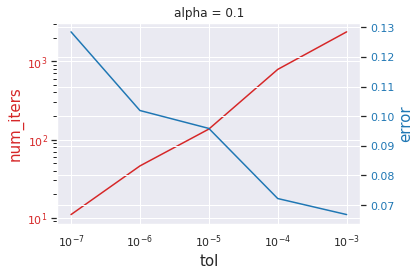

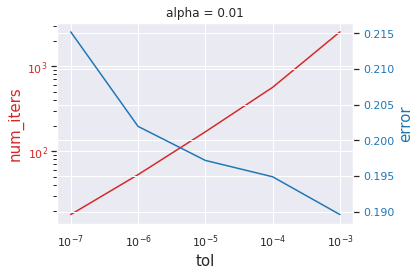

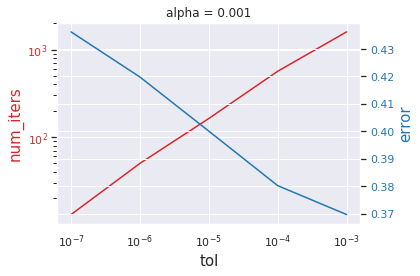

In [ ]:
Tol=[1e-7,1e-6,1e-5,1e-4,1e-3]
for i,alpha in enumerate([0.1,0.01,0.001]):
    fig, ax1 = plt.subplots()
    plt.title(f"alpha = {alpha}")
    color = 'tab:red'
    ax1.set_xlabel('tol',fontsize=15)
    ax1.set_xscale('log')
    ax1.set_ylabel('num_iters', color=color,fontsize=15)
    ax1.set_yscale('log')
    ax1.plot(Tol, num_iters[i,:], color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()

    color = 'tab:blue'
    ax2.set_ylabel('error', color=color,fontsize=15)
    ax2.plot(Tol, err[i,:], color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()
    plt.show()


Comment on the results:

 1) why the relative error does not converge to zero? 
Since CG method generates $A$-orthogonal sequence $p_1, \ldots, p_N$, after $n$ steps it should stop (i.e., $p_{N+1} = 0$.)\
But in practice it does not have this property in finite precision: float numbers have a machine error $\approx 10^{-16} $. Deconvolution is an ill-conditioned problem, thus, even such a small error affects the result of cg method. 

 2) why the relative error converges to different values for different $\alpha$?\
 **tol** parameter stops the deduction of $x$ from $Ax = b$ when $\text{norm}(residual) \leq \max(tol*norm(b), atol)$, where $residual = Ax_k-b$. For different $α$ residual equal to the $tol*norm(b)$ will correspond to different values of $x_k$ and, thus, to different errors.

In all further tasks fix $\alpha = 0.01$. Compute $y = Tx$, and add vector with Gaussian noise from $\mathcal{N}(0, 1)$ to $y$ and get the final right-hand side $\hat{y}$.

## Task 3 (10 pts)
- Try to deconvolve $\hat{y}$ with matrix $T$ using $tol=10^{-5}$ in CG. Explain, why CG does not converge.
- Suggest how CG can still be used to recover $x$. What are drawbacks of the suggested approach?

In [6]:
alpha = 0.01
T = get_T(alpha)
y = T.dot(x_1d)
y_noisy = y+ np.random.normal(0,1,y.shape)

In [ ]:
x_deconv_noisy, info = spla.cg(T,y_noisy,tol = 1e-5, maxiter = 300)

In [ ]:
info #the number of iterations reached 300 without achieving convergance

300

In [ ]:
np.linalg.norm(x_1d-x_deconv_noisy)/np.linalg.norm(x_1d) #huge error

118670.73846602235

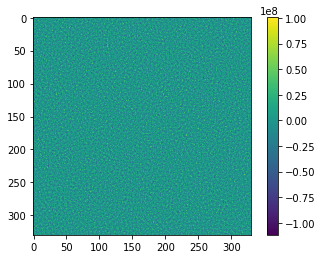

In [ ]:
plt.imshow( (x_deconv_noisy.real).reshape(n,n))
plt.colorbar()

- Explain, why CG does not converge.

As was said in task 2, CG is an ill-conditioned problem, so even the smallest machine errors won't let it converge without an error. Thus, Gaussian noise will strongly affect the results of the deconvolution.

- Suggest how CG can still be used to recover x. What are drawbacks of the suggested approach?

1. the use of Tikhonov regularization
2. the use of preconditioner

the drawback is a modification of the current T matrix, so the obtained result will 100% differentiate from the original X value


## Task 4 (10 pts)

- Implement Tikhonov regularization, i.e. deconvolve $\hat{y}$ with the perturbed matrix $T_{\lambda} = T + \lambda^2I$ instead of $T$. Modify `T_matvec()` according to the template below.
- Perform computations for all $\lambda \in \{10, 1, 0.1\}$ and $tol \in \{10^{-3}, 10^{-4}, 10^{-5},10^{-6}, 10^{-7} \}$. For each pair $(\lambda, tol)$ write out `num_iters` and relative error $e = \frac{\|x - x^*\|_2}{\|x\|_2}$. Comment on the results: 
    - Compare robustness of the convergence with task 2. What the observed results indicate?

In [7]:
alpha = 0.01
T = get_T(alpha)
y = T.dot(x_1d)
y_noisy = y+ np.random.normal(0,1,y.shape)

In [8]:
n=len(x)
def get_t_lmbda(n,alpha,lmbda):
    '''
    returns t matrix (2n-1)x(2n-1) with addition of lambda^2 to [0,0] element
    '''
    mesh_1,mesh_2 = np.meshgrid(np.arange(-(n-1),n),np.arange(-(n-1),n))
    mesh_1 = np.concatenate((mesh_1[:,n-1:],mesh_1[:,:n-1]),axis=1)
    mesh_2 = np.concatenate((mesh_2[n-1:,:],mesh_2[0:n-1,:]),axis=0)
    t_lmbda = (alpha/np.pi)*np.exp(-alpha*( mesh_1**2 + mesh_2**2 ) )
    t_lmbda[0,0]+=lmbda**2
    return t_lmbda
def T_lmbda_matvec(lmbda, aplha, x=x_1d):
    '''
    Tikhonov regularization
    new T_matvec method utilizing new t matrix 
    '''
    n = int(len(x)**0.5)
    x = get_x_padded(x,n)
    t = get_t_lmbda(n,alpha,lmbda)
    y = fft.ifft2(fft.fft2(t)*fft.fft2(x))
    y = y[:n,:n]
    y = y.reshape(1,n**2)
    return y

def get_T_lmbda(lmbda, alpha, x=x_1d):
    return spla.LinearOperator((n**2, n**2), matvec = lambda x : T_lmbda_matvec(lmbda, alpha, x))

-------lmbda = 10.0, tol = 1e-03--------
num_iters = 1   , error = 0.992, time = 0.5045



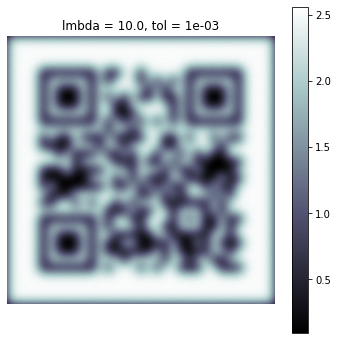

-------lmbda = 10.0, tol = 1e-04--------
num_iters = 2   , error = 0.992, time = 0.9853



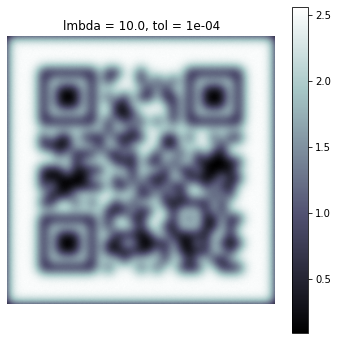

-------lmbda = 10.0, tol = 1e-05--------
num_iters = 2   , error = 0.992, time = 0.9626



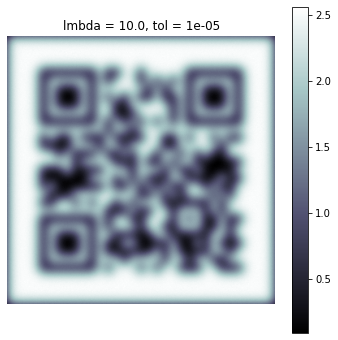

-------lmbda = 10.0, tol = 1e-06--------
num_iters = 3   , error = 0.992, time = 1.2219



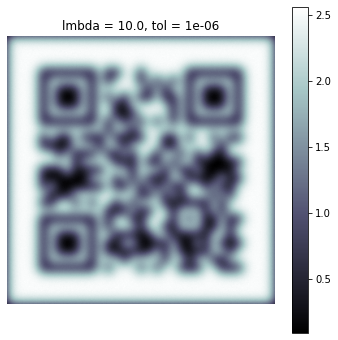

-------lmbda = 10.0, tol = 1e-07--------
num_iters = 3   , error = 0.992, time = 1.2362



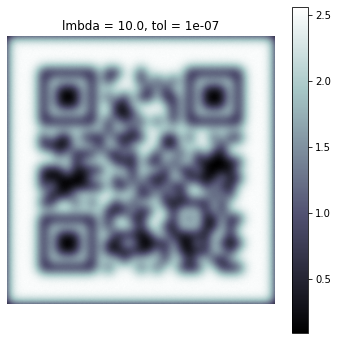



-------lmbda =  1.0, tol = 1e-03--------
num_iters = 4   , error = 0.615, time = 1.5620



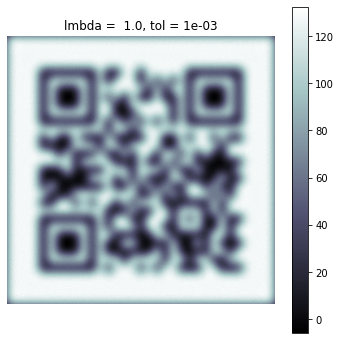

-------lmbda =  1.0, tol = 1e-04--------
num_iters = 5   , error = 0.615, time = 1.7399



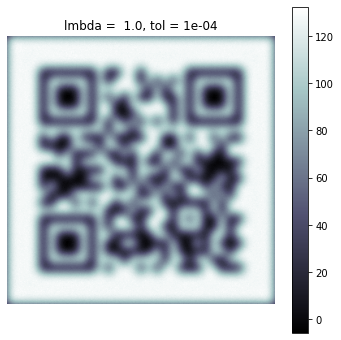

-------lmbda =  1.0, tol = 1e-05--------
num_iters = 6   , error = 0.615, time = 1.9911



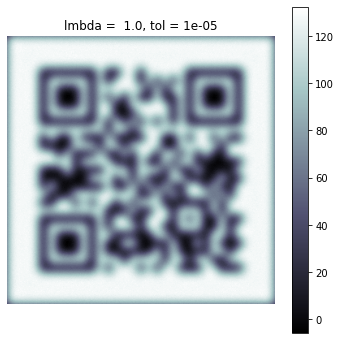

-------lmbda =  1.0, tol = 1e-06--------
num_iters = 8   , error = 0.615, time = 2.4177



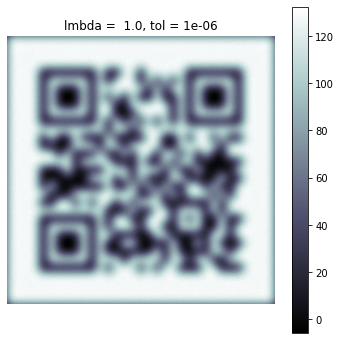

-------lmbda =  1.0, tol = 1e-07--------
num_iters = 9   , error = 0.615, time = 2.7106



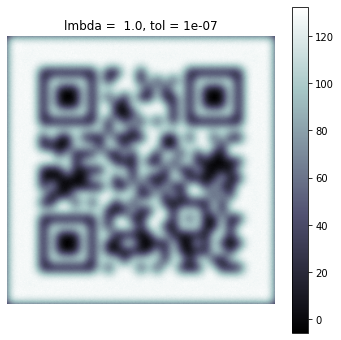



-------lmbda =  0.1, tol = 1e-03--------
num_iters = 19  , error = 0.512, time = 5.1920



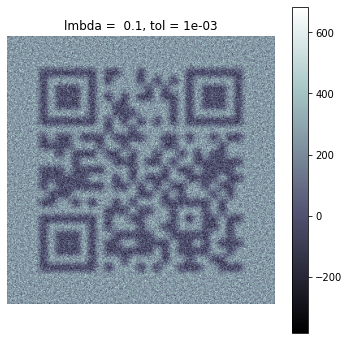

-------lmbda =  0.1, tol = 1e-04--------
num_iters = 28  , error = 0.516, time = 7.4558



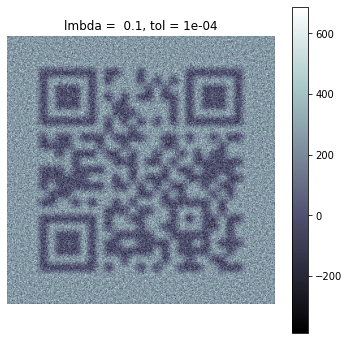

-------lmbda =  0.1, tol = 1e-05--------
num_iters = 38  , error = 0.516, time = 9.8129



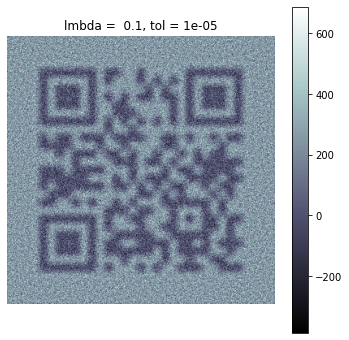

-------lmbda =  0.1, tol = 1e-06--------
num_iters = 50  , error = 0.516, time = 12.8026



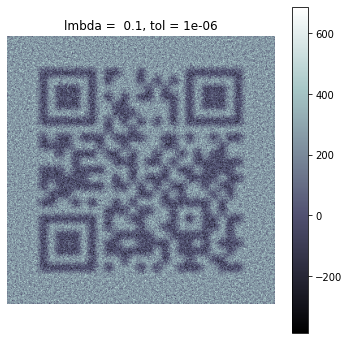

-------lmbda =  0.1, tol = 1e-07--------
num_iters = 61  , error = 0.516, time = 15.4451



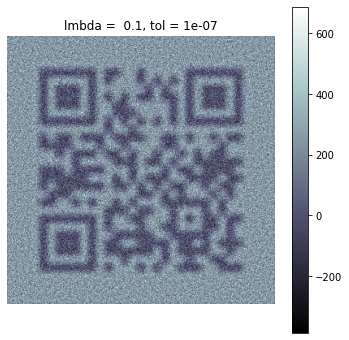

In [18]:
num_iters = np.zeros((3,5))
err = np.zeros((3,5))
runtime = np.zeros((3,5))
runtime_per_iter = np.zeros((3,5))
for i,lmbda in enumerate([10,1,0.1]):
    for j,tol in enumerate([1e-3,1e-4,1e-5,1e-6,1e-7]):

        T = get_T_lmbda(lmbda, alpha)
        start = time.time()
        x_deconv, num_iters[i,j] = solve_sparse(T, y_noisy, tol)
        end = time.time()
        runtime[i,j] = end-start
        runtime_per_iter[i,j] = runtime[i,j] / num_iters[i,j]
        err[i,j] = np.linalg.norm(x_1d-x_deconv)/np.linalg.norm(x_1d)
        print( ("lmbda = {:4.1f}, tol = {:4.0e}".format(lmbda,tol)).center(40,'-') )
        print(  ("num_iters = {:<4.0f}, error = {:4.3f}, time = {:4.4f}\n".format(num_iters[i,j],err[i,j],runtime[i,j])).center(40) )
        
        plt.figure(figsize=(6,6))
        plt.imshow((x_deconv.real).reshape(n,n),cmap='bone')
        plt.axis('off')
        plt.colorbar()
        plt.title("lmbda = {:4.1f}, tol = {:4.0e}".format(lmbda,tol))
        plt.show()
    print('\n')

## Task 5 (20 pts)

- Implement BCCB preconditioner for $T_{\lambda}$ based on Strang preconditioner for Toeplitz matrix (hint: build circulants using first columns of Toeplitz matrices on both levels). You know from lectures that circulants can be explicitly inverted using convolution theorem. Implement the corresponding matvec according to the template provided below.
- Check speedup in iterations and runtime that can be gained from the preconditioning for $\alpha = 0.01$, $\lambda = 1$ compared with Task 4. Explain results.

In [12]:
def get_T_column(n,alpha,lmbda):
    '''
    returns the first column of block matrix T
    '''
    first_ind_col = np.repeat(np.arange(n),n)
    second_ind_col = np.tile(np.arange(n),n)
    t_col = (alpha/np.pi)*np.exp(-alpha*( first_ind_col**2 + second_ind_col**2 ) )
    t_col[0]+=lmbda
    return t_col

In [13]:
def C_inv_matvec(lmbda, alpha, y=y_noisy):
    '''
    function for effective  deconvolution of y = Tx
    '''
    n = int(len(y)**0.5)
    c = get_T_column(n,alpha,lmbda)
    x = fft.ifft((1/fft.fft(c))*fft.fft(y))
    x = x.reshape(1,n**2)
    return x

def get_C(lmbda,alpha, y=y_noisy):
    return spla.LinearOperator((n**2, n**2), matvec = lambda y : C_inv_matvec(lmbda, alpha, y))

In [14]:
start = time.time()
C = get_C(1,0.01)
end = time.time()
c_inv_runtime = end - start

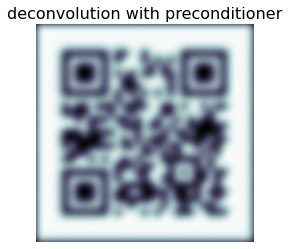

In [15]:
plt.imshow((C.dot(y_noisy).real).reshape(n,n),cmap='bone')
plt.axis('off')
plt.title("deconvolution with preconditioner", fontsize=16)
plt.show()

In [20]:
speedup = runtime[1,:]/c_inv_runtime
speedup_per_iter = runtime_per_iter[1,:]/c_inv_runtime

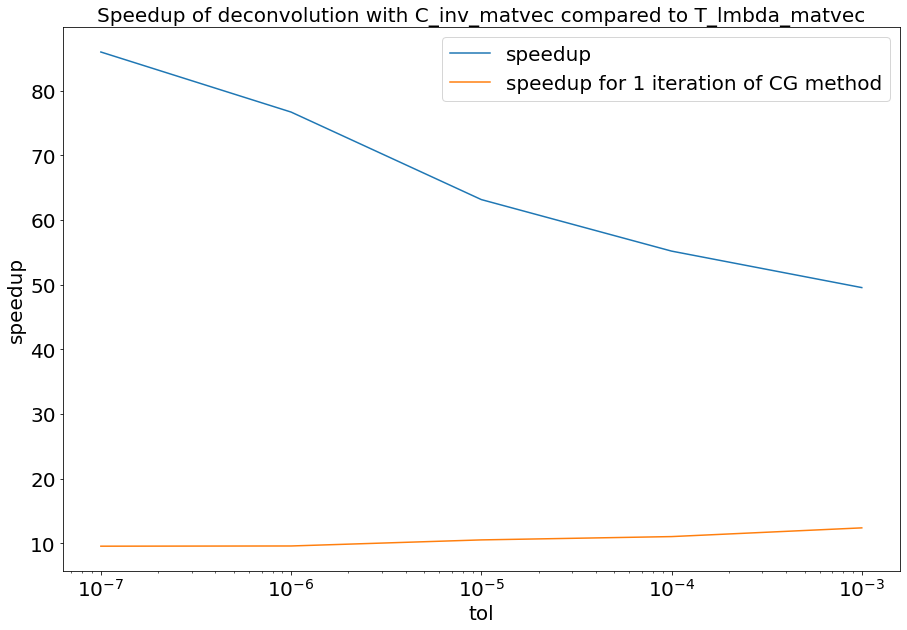

In [23]:
plt.figure(figsize=(15,10))
plt.title("Speedup of deconvolution with C_inv_matvec compared to T_lmbda_matvec",fontsize=20)
plt.plot([1e-3,1e-4,1e-5,1e-6,1e-7],speedup,label='speedup')
plt.plot([1e-3,1e-4,1e-5,1e-6,1e-7],speedup_per_iter,label='speedup for 1 iteration of CG method')
plt.legend(fontsize=20)
plt.plot()
plt.xscale('log')
plt.xlabel("tol",fontsize=20)
plt.ylabel('speedup',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

1. CG is an iterative process, so with increase of tol and ,hence, increase of number of iterations, the time of the process goes up. 
2. just 1 iteration of CG method contains 2d fft and 2d ifft , but **C_inv_matvec** uses only 1d fft and ifft